In [2]:
# We are about to make dumbest possible neural net. It will contain 1 neuron and no bias.
# We will be optimizing grayscale pixel
# Basically, this is more visual example for the simplest possible neural network from the book "grokking deep learning"

In [3]:
!pip install pillow


In [4]:
import numpy as np
from PIL import Image

In [5]:
# this is the target pixel. it is light gray
target_pix = np.array([[220]])

# let's visualize it. 
def show(im):
    """use PIL 5.2.0. I've tried 7.0.0 and it blurs images when upscaling!"""
    return Image.fromarray(im.astype('uint8')).resize((256, 256))
  

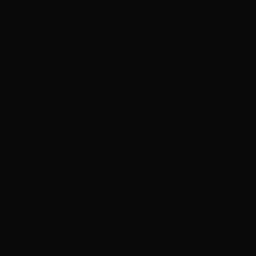

In [6]:
# this is the input pixel, almost black

input_pix = np.array([[10,]])

show(input_pix)

Prediction: [[6.20452179]], Error: 45708.506501564334


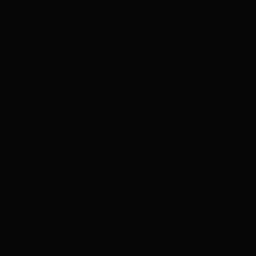

In [7]:
# let's make initial prediction. 
w_init = np.random.random()
pred = input_pix * w_init
err = ((pred - target_pix) ** 2).sum()  # square the error, so it's always positive
print("Prediction: {}, Error: {}".format(pred, err))

# it's more black that the original! Bad!
show(pred)

In [8]:
# we'll be using hot-cold method 
# change weight a little, up and down, and see which way reduces error

def learn_step(w, inp, goal, learning_rate=0.1):
    lr = learning_rate
    def get_err(w):
        return ((inp * w - goal) ** 2).sum()
    
    err = get_err(w)
    err_up = get_err(w + lr)
    err_down = get_err(w - lr)
    
    if err_up < err_down:
        w = w + lr
        err = err_up
    
    else: 
      w = w - lr
      err = err_down

    return w, inp * w, err


# let's learn! if everything is OK, error should decrease.
preds = []
w, pred, err = learn_step(w_init, input_pix, target_pix)
for i in range(220):
    w, pred, err = learn_step(w, input_pix, target_pix)
    preds.append(pred)
    print("Iteration {}. Weight: {}, Prediction: {}, Error: {}".format(i, w, pred, err))


Iteration 0. Weight: 0.8204521793457156, Prediction: [[8.20452179]], Error: 44857.32458873816
Iteration 1. Weight: 0.9204521793457155, Prediction: [[9.20452179]], Error: 44434.73363232508
Iteration 2. Weight: 1.0204521793457155, Prediction: [[10.20452179]], Error: 44014.14267591199
Iteration 3. Weight: 1.1204521793457156, Prediction: [[11.20452179]], Error: 43595.55171949891
Iteration 4. Weight: 1.2204521793457157, Prediction: [[12.20452179]], Error: 43178.96076308582
Iteration 5. Weight: 1.3204521793457158, Prediction: [[13.20452179]], Error: 42764.36980667274
Iteration 6. Weight: 1.4204521793457159, Prediction: [[14.20452179]], Error: 42351.778850259645
Iteration 7. Weight: 1.520452179345716, Prediction: [[15.20452179]], Error: 41941.18789384656
Iteration 8. Weight: 1.620452179345716, Prediction: [[16.20452179]], Error: 41532.596937433475
Iteration 9. Weight: 1.7204521793457161, Prediction: [[17.20452179]], Error: 41126.00598102039
Iteration 10. Weight: 1.8204521793457162, Prediction

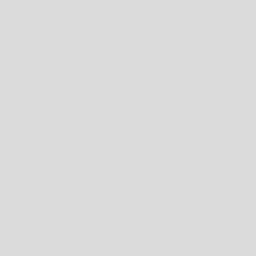

In [9]:
# let's look at our learned pixel:
show(pred)  # not bad!

In [10]:
# thats all folks!
from IPython.display import HTML

HTML("""<img src="https://i.imgur.com/tY3GksS.gif">
""")

In [11]:
# we can set the initial value of input to 1. 
# Then apply this algorithm 3 times, to determine red, green, and blue values for output pixel.
# we'll call it xy2rgb net.


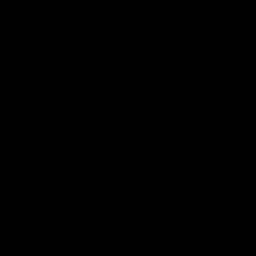

In [12]:
input = np.array([[[1, 1, 1]]])
show(input)

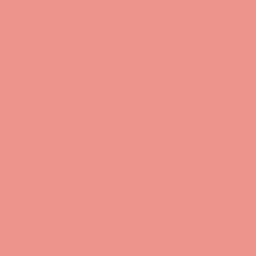

In [13]:
target = np.array([[[np.random.randint(0, 255) for _ in range(3)]]])
show(target)

In [14]:
# learning colourful pixel is like learning 3 different grayscale values
def rgb_to_gs(rgb):
    return [np.array([[rgb[0][0][i]]]) for i in range(3)]

rgb_to_gs(target)

[array([[233]]), array([[149]]), array([[140]])]

In [15]:
# we'll be optimizing by GRADIENT DESCENT
# this means, we want to change the weight by variable step, depending on how big the error is

def gradient_descent_step(w, input, target):
    pred = input * w
    err = ((pred - target) ** 2).sum()
    direction_and_amount = (pred - target) * input.sum()
    print(direction_and_amount)
    w -= direction_and_amount
    return w, err, pred

w_init = 0.5
w = [w_init for _ in range(3)]  # this is a neural network with 1 layer and 3 neurons
pred = [1, 1, 1]

for _ in range(10):
    for i in range(3):
        w[i], err, pred[i] = gradient_descent_step(w[i], rgb_to_gs(input)[i], rgb_to_gs(target)[i])
        print(i, w, err, pred)    


[[-232.5]]
0 [array([[233.]]), 0.5, 0.5] 54056.25 [array([[0.5]]), 1, 1]
[[-148.5]]
1 [array([[233.]]), array([[149.]]), 0.5] 22052.25 [array([[0.5]]), array([[0.5]]), 1]
[[-139.5]]
2 [array([[233.]]), array([[149.]]), array([[140.]])] 19460.25 [array([[0.5]]), array([[0.5]]), array([[0.5]])]
[[0.]]
0 [array([[233.]]), array([[149.]]), array([[140.]])] 0.0 [array([[233.]]), array([[0.5]]), array([[0.5]])]
[[0.]]
1 [array([[233.]]), array([[149.]]), array([[140.]])] 0.0 [array([[233.]]), array([[149.]]), array([[0.5]])]
[[0.]]
2 [array([[233.]]), array([[149.]]), array([[140.]])] 0.0 [array([[233.]]), array([[149.]]), array([[140.]])]
[[0.]]
0 [array([[233.]]), array([[149.]]), array([[140.]])] 0.0 [array([[233.]]), array([[149.]]), array([[140.]])]
[[0.]]
1 [array([[233.]]), array([[149.]]), array([[140.]])] 0.0 [array([[233.]]), array([[149.]]), array([[140.]])]
[[0.]]
2 [array([[233.]]), array([[149.]]), array([[140.]])] 0.0 [array([[233.]]), array([[149.]]), array([[140.]])]
[[0.]]


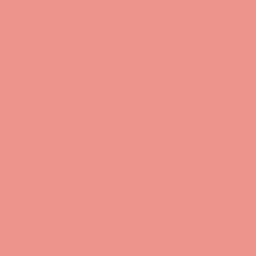

In [16]:
show(np.array([[[pred[i][0][0] for i in range(3)]]]))  # wow that converged quickly

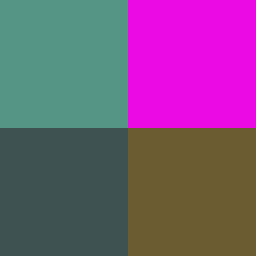

In [17]:
# more pixels

def randpix():
    return np.array([np.random.randint(0, 255) for _ in range(3)])

input4 = np.array([[randpix(), randpix()],[randpix(), randpix()]], dtype='uint8')
show(input4)

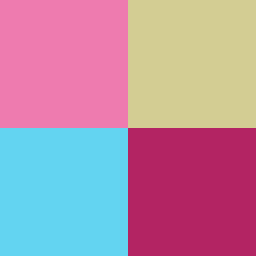

In [18]:
target4 = np.array([[randpix(), randpix()],[randpix(), randpix()]], dtype='uint8')
show(target4)

In [19]:
input4[0][0]

array([ 84, 150, 131], dtype=uint8)

In [20]:
target4[0][0]

array([238, 123, 175], dtype=uint8)

In [21]:
# this is basically doing the same thing as the last time, for each pixel.

def optimize_pixel(input, target, steps=10):
    w_init = 0.5
    w = [w_init for _ in range(3)]  # this is a neural network with 1 layer and 3 neurons
    pred = [1, 1, 1]

    for _ in range(steps):
        for i in range(3):
            w[i], err, pred[i] = gradient_descent_step(w[i], rgb_to_gs(input)[i], rgb_to_gs(target)[i])
            print(i, w, err, pred)
    return w

optimize_pixel([[input4[0][0]]], [[target4[0][0]]])
# why does it not converge? 

[[-16464.]]
0 [array([[16464.5]]), 0.5, 0.5] 38416.0 [array([[42.]]), 1, 1]
[[-7200.]]
1 [array([[16464.5]]), array([[7200.5]]), 0.5] 2304.0 [array([[42.]]), array([[75.]]), 1]
[[-14344.5]]
2 [array([[16464.5]]), array([[7200.5]]), array([[14345.]])] 11990.25 [array([[42.]]), array([[75.]]), array([[65.5]])]
[[1.1615352e+08]]
0 [array([[-1.16137056e+08]]), array([[7200.5]]), array([[14345.]])] 1912080528400.0 [array([[1383018.]]), array([[75.]]), array([[65.5]])]
[[1.619928e+08]]
1 [array([[-1.16137056e+08]]), array([[-1.619856e+08]]), array([[14345.]])] 1166296322304.0 [array([[1383018.]]), array([[1080075.]]), array([[65.5]])]
[[2.4615162e+08]]
2 [array([[-1.16137056e+08]]), array([[-1.619856e+08]]), array([[-2.46137275e+08]])] 3530716160400.0 [array([[1383018.]]), array([[1080075.]]), array([[1879195.]])]
[[-8.19463084e+11]]
0 [array([[8.19346947e+11]]), array([[-1.619856e+08]]), array([[-2.46137275e+08]])] 9.51700319420664e+19 [array([[-9.75551266e+09]]), array([[1080075.]]), array

[array([[-7.12765986e+38]]),
 array([[-1.06360932e+43]]),
 array([[-1.85061321e+42]])]

In [33]:
# lets set the input to be small
corrected_input4 = input4 / input4 

w4_00 = optimize_pixel([[corrected_input4[0][0]]], [[target4[0][0]]])
# now it converges!

[[-237.5]]
0 [array([[238.]]), 0.5, 0.5] 56406.25 [array([[0.5]]), 1, 1]
[[-122.5]]
1 [array([[238.]]), array([[123.]]), 0.5] 15006.25 [array([[0.5]]), array([[0.5]]), 1]
[[-174.5]]
2 [array([[238.]]), array([[123.]]), array([[175.]])] 30450.25 [array([[0.5]]), array([[0.5]]), array([[0.5]])]
[[0.]]
0 [array([[238.]]), array([[123.]]), array([[175.]])] 0.0 [array([[238.]]), array([[0.5]]), array([[0.5]])]
[[0.]]
1 [array([[238.]]), array([[123.]]), array([[175.]])] 0.0 [array([[238.]]), array([[123.]]), array([[0.5]])]
[[0.]]
2 [array([[238.]]), array([[123.]]), array([[175.]])] 0.0 [array([[238.]]), array([[123.]]), array([[175.]])]
[[0.]]
0 [array([[238.]]), array([[123.]]), array([[175.]])] 0.0 [array([[238.]]), array([[123.]]), array([[175.]])]
[[0.]]
1 [array([[238.]]), array([[123.]]), array([[175.]])] 0.0 [array([[238.]]), array([[123.]]), array([[175.]])]
[[0.]]
2 [array([[238.]]), array([[123.]]), array([[175.]])] 0.0 [array([[238.]]), array([[123.]]), array([[175.]])]
[[0.]]


In [54]:
def unnest(nested):
    return np.array([i[0][0] for i in nested])
    
def optimize4(input, target):
    return [[unnest(optimize_pixel([[input[j, i]]], [[target[j, i]]], steps=1)) for i in (0, 1)] for j in (0, 1)]

In [63]:
w4 = optimize4(corrected_input4, target4)

[[-237.5]]
0 [array([[238.]]), 0.5, 0.5] 56406.25 [array([[0.5]]), 1, 1]
[[-122.5]]
1 [array([[238.]]), array([[123.]]), 0.5] 15006.25 [array([[0.5]]), array([[0.5]]), 1]
[[-174.5]]
2 [array([[238.]]), array([[123.]]), array([[175.]])] 30450.25 [array([[0.5]]), array([[0.5]]), array([[0.5]])]
[[-210.5]]
0 [array([[211.]]), 0.5, 0.5] 44310.25 [array([[0.5]]), 1, 1]
[[-204.5]]
1 [array([[211.]]), array([[205.]]), 0.5] 41820.25 [array([[0.5]]), array([[0.5]]), 1]
[[-146.5]]
2 [array([[211.]]), array([[205.]]), array([[147.]])] 21462.25 [array([[0.5]]), array([[0.5]]), array([[0.5]])]
[[-98.5]]
0 [array([[99.]]), 0.5, 0.5] 9702.25 [array([[0.5]]), 1, 1]
[[-211.5]]
1 [array([[99.]]), array([[212.]]), 0.5] 44732.25 [array([[0.5]]), array([[0.5]]), 1]
[[-240.5]]
2 [array([[99.]]), array([[212.]]), array([[241.]])] 57840.25 [array([[0.5]]), array([[0.5]]), array([[0.5]])]
[[-178.5]]
0 [array([[179.]]), 0.5, 0.5] 31862.25 [array([[0.5]]), 1, 1]
[[-35.5]]
1 [array([[179.]]), array([[36.]]), 0.5]

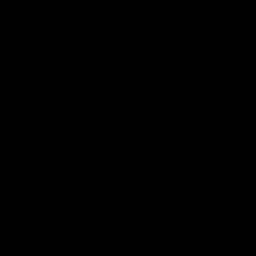

In [58]:
show(corrected_input4)

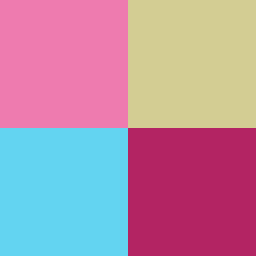

In [59]:
show(target4)

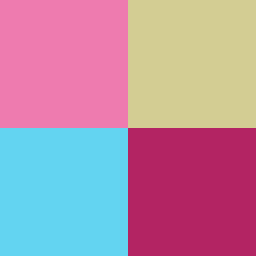

In [66]:
show(corrected_input4 * w4 )
# wow, it converges in one step.

In [91]:
# just testing if I've memorized the gradient descent alg
def gd(input, target, w=0.5, a=0.1):
    pred = input*w
    error = (target-pred) ** 2
    
    derivative = input * (target-pred)
    delta = a * derivative
    w += delta
    return w

In [95]:
w = gd(1, 100)
for _ in range(10):
    w = gd(10, 100, w, a=0.01)
    print(w, w*10)

10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
10.0 100.0
